In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import utils
datainput = pd.read_csv("areavsprod.csv")
datainput.head()

,crops,area,production_tonn,productivity
0,kuruvai,293030,1046910,3573
1,kuruvai,335715,1384666,4125
2,kuruvai,209758,833149,3972
3,kuruvai,290683,1258422,4329
4,kuruvai,295402,1382550,4680


In [21]:
#label encoder to categorical data 
labelencoder_X = preprocessing.LabelEncoder()
datainput['crops'] = labelencoder_X.fit_transform(datainput['crops'])

In [22]:
x2 = datainput.drop('productivity',axis=1)
y = datainput['productivity']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x3 = sc.fit_transform(x2)
#Splitting
X_train, X_test, y_train, y_test = train_test_split(x3, y, test_size=0.3, random_state=3)

In [20]:
#MULTI LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test) 
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('R2 score  is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score  is  0.024707699848330877
mean_sqrd_error is== 169438992.53619453
root_mean_squared error of is== 13016.873377896649


In [13]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
print("R2 score =", round(r2_score(y_test, y_pred), 2))

R2 score = -0.26


In [14]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("R2 score =", round(r2_score(y_test, y_pred), 2))

R2 score = 0.87


In [15]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("R2 score =", round(r2_score(y_test, y_pred), 2))

R2 score = 0.85


[ 2406   404    91   895  1414 12068   401   229    91   404   401   229
   470   231    91   219    91   236   231   219    90  2406   562 15408
   220  4641   573   401   231   219   219  3563   305   231    91  1155
   926    90   392   392  3740   219 10638    87   231  1325  8978  1963
   944   231  1325   926   219   978  4488  7232  4488   219   404   404
   312   392    91 33287   219    90   312   410  1963   699   312  2058
  8519  7232   263  8519  5780  3252    91  8978    91   236    87  3563
  2406   336   617   404  8519  3252   645    91   580   978 11691 26338
  9312   306   336 26338  4488   404  3563   548 12068 12068  8978   231
   518   895   645   573   459   518  7232   699   220   220   573  3252
 26338  8978   404   312  1963   224   926  2406  1963   392   236   478
   312   229   220   219  3563   336   573   573  8978 17848   944 33287
    91    91  9312    87    91   401  9312   401   978]
0.0196078431372549


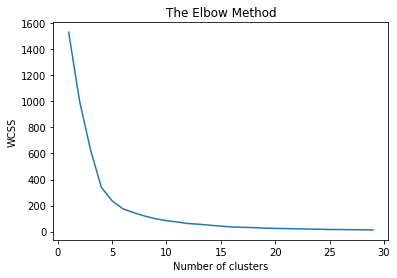

In [10]:
#KMEANS CLUSTERING
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 
print(knn.score(X_test, y_test)) 

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x3)

In [25]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 101, random_state = 42)
classifier.fit(X_train, y_train)
# Predicting a new result
y_pred = classifier.predict(X_test)
print("R2 score =", round(r2_score(y_test, y_pred), 2))

R2 score = 0.91


In [27]:
import pickle
pickle.dump(classifier, open('productivityrandomforest.sav', 'wb'))

RMSE value for k=  1 is: 4165.712111835479
RMSE value for k=  2 is: 3208.640730371867
RMSE value for k=  3 is: 2995.903634186258
RMSE value for k=  4 is: 3403.33386127831
RMSE value for k=  5 is: 3766.8230184797667
RMSE value for k=  6 is: 4635.799710520711
RMSE value for k=  7 is: 5890.654953481749
RMSE value for k=  8 is: 7024.348627402927
RMSE value for k=  9 is: 8276.290423476396
RMSE value for k=  10 is: 9253.094919517895
RMSE value for k=  11 is: 9498.94505774555
RMSE value for k=  12 is: 9544.95668636863
RMSE value for k=  13 is: 9548.267599480738
RMSE value for k=  14 is: 9641.682331189419
RMSE value for k=  15 is: 9724.457997006364
RMSE value for k=  16 is: 9960.027002975188
RMSE value for k=  17 is: 10255.938820012216
RMSE value for k=  18 is: 10434.98785295342
RMSE value for k=  19 is: 10612.161463173476
RMSE value for k=  20 is: 10788.5745567348
3403.33386127831


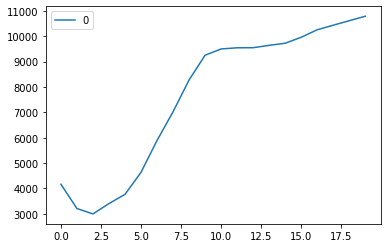

In [17]:
#KNN CLASSIFICATION
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

from sklearn.neighbors import KNeighborsClassifier

regressor = neighbors.KNeighborsRegressor(n_neighbors = 4)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
rmse_val.append(error)

print(error)